# Исследование данных о российском кинопрокате



## Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd # подключаем библиотеки
import numpy as np
import datetime

#вывод больших чисел в красивом формате
pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns

matplotlib.rcParams.update({'font.size': 14})

#игнорировать прежупреждения
import warnings
warnings.filterwarnings("ignore")

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

from datetime import datetime


In [2]:
try: # загружаем данные
    data = pd.read_csv('/datasets/mkrf_movies.csv')
    data_small = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    data_small = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
    
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
# определяем тип данных столбца
data['puNumber'].dtypes 

dtype('O')

In [4]:
#удаляем пробелы
data['puNumber'] = data['puNumber'].replace(' ', '')

In [5]:
# проверяем данные - они представлены строками
data['puNumber'].unique()

array(['221048915', '111013716', '221038416', ..., '124010819',
       '124010619', '124010719'], dtype=object)

In [6]:
data_small.head(5)

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [7]:
data_small['puNumber'].dtypes

dtype('int64')

In [8]:
#заменяем значения, мешающие изменению формата столбца на цифровой
data.loc[data['puNumber'] == 'нет', 'puNumber'] = 0
#исправляем формат данных в 'puNumber'
data['puNumber'] = pd.to_numeric(data['puNumber'])

In [9]:
#объединяем датафреймы
data = data.merge(data_small, on='puNumber', how='left')
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [10]:
#для наглядности выводм данные из произвольной строки датафрейма
data.loc[456].to_frame()

,456
title,Лето. Одноклассники. Любовь
puNumber,121014812
show_start_date,2012-06-18T12:00:00.000Z
type,Художественный
film_studio,"Дабл Фьючер Филмз, Лол Продакшнз, Мандейт Пикчерз, ПиАйСи Эденси"
production_country,США
director,Лиза Азуэлос
producer,"Майкл Шамберг, Стейси Шер, Тиш Сайрус"
age_restriction,«16+» - для детей старше 16 лет
refundable_support,NaN


In [11]:
print('Количество строк данных', data.shape[0])
print('Количество столбцов данных', data.shape[1])

Количество строк данных 7486
Количество столбцов данных 16


## Шаг 2. Предобработка данных

### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [12]:
data.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

In [13]:
# отбор числовых колонок
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print('Столбцы с количественными признаками: \n', numeric_cols)

# отбор нечисловых колонок
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
print('Столбцы с качественными признаками: \n', non_numeric_cols)

Столбцы с количественными признаками: 
 ['puNumber' 'refundable_support' 'nonrefundable_support' 'budget'
 'box_office']
Столбцы с качественными признаками: 
 ['title' 'show_start_date' 'type' 'film_studio' 'production_country'
 'director' 'producer' 'age_restriction' 'financing_source' 'ratings'
 'genres']


In [14]:
# show_start_date - переводим в datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')

#убираем минуты и секунды, переводим в формат period,
#т.к. в datetime метка времени неубиваема, а формат период удобен именно при 
#запросах по дням, месяцам и годам
data['show_start_date'] = data['show_start_date'].dt.to_period("D")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   title                  7486 non-null   object   
 1   puNumber               7486 non-null   int64    
 2   show_start_date        7486 non-null   period[D]
 3   type                   7486 non-null   object   
 4   film_studio            7468 non-null   object   
 5   production_country     7484 non-null   object   
 6   director               7477 non-null   object   
 7   producer               6918 non-null   object   
 8   age_restriction        7486 non-null   object   
 9   refundable_support     332 non-null    float64  
 10  nonrefundable_support  332 non-null    float64  
 11  budget                 332 non-null    float64  
 12  financing_source       332 non-null    object   
 13  ratings                6519 non-null   object   
 14  genres                 6

In [16]:
data.loc[456].to_frame()

,456
title,Лето. Одноклассники. Любовь
puNumber,121014812
show_start_date,2012-06-18
type,Художественный
film_studio,"Дабл Фьючер Филмз, Лол Продакшнз, Мандейт Пикчерз, ПиАйСи Эденси"
production_country,США
director,Лиза Азуэлос
producer,"Майкл Шамберг, Стейси Шер, Тиш Сайрус"
age_restriction,«16+» - для детей старше 16 лет
refundable_support,NaN


In [17]:
data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.00,332.00,332.00,3158.00
mean,11864457.83,48980988.89,127229716.68,76478696.16
std,24916555.26,59980117.92,188588333.12,240353122.82
min,0.00,0.00,0.00,0.00
25%,0.00,25000000.00,42000000.00,86239.00
50%,0.00,30000000.00,68649916.00,2327987.55
75%,15000000.00,40375000.00,141985319.50,23979671.02
max,180000000.00,400000000.00,2305074303.00,3073568690.79


In [18]:
#переводим данные о деньгах в тысячи рублей
data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']] = data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].apply(lambda x: x / 1000)
data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.00,332.00,332.00,3158.00
mean,11864.46,48980.99,127229.72,76478.70
std,24916.56,59980.12,188588.33,240353.12
min,0.00,0.00,0.00,0.00
25%,0.00,25000.00,42000.00,86.24
50%,0.00,30000.00,68649.92,2327.99
75%,15000.00,40375.00,141985.32,23979.67
max,180000.00,400000.00,2305074.30,3073568.69


In [19]:
#данные содержат дефекты в виде значеий в процентах, восстановить их не удастся.
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [20]:
#отфильтровываем датафрейм с дефектными значениями, содержащими `%`
data[data['ratings'].str.contains('%', na=False)].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филмз, АйЭнСиЭйЭй",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.74
1053,Песочный человек,121029212,2012-11-29,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.29


In [21]:
print('Количество строк с дефектными значениями', len(data[data['ratings'].str.contains('%',na=False)]))

Количество строк с дефектными значениями 29


In [22]:
#удаляем дефектные строки, т.к. их мало и они не повлияют на общую картину.
data = data.drop(data.loc[data['ratings'].str.contains('%',na=False)].index).reset_index(drop=True)
#преобразуем в числовой формат
data['ratings'] = pd.to_numeric(data['ratings'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7457 entries, 0 to 7456
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   title                  7457 non-null   object   
 1   puNumber               7457 non-null   int64    
 2   show_start_date        7457 non-null   period[D]
 3   type                   7457 non-null   object   
 4   film_studio            7439 non-null   object   
 5   production_country     7455 non-null   object   
 6   director               7448 non-null   object   
 7   producer               6889 non-null   object   
 8   age_restriction        7457 non-null   object   
 9   refundable_support     330 non-null    float64  
 10  nonrefundable_support  330 non-null    float64  
 11  budget                 330 non-null    float64  
 12  financing_source       330 non-null    object   
 13  ratings                6490 non-null   float64  
 14  genres                 6

### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [23]:
pd.DataFrame(data.isna().sum())

,0
title,0
puNumber,0
show_start_date,0
type,0
film_studio,18
production_country,2
director,9
producer,568
age_restriction,0
refundable_support,7127


In [24]:
#визуализируем в процентах от общего числа строк
pd.DataFrame(data.isna().sum()* 100 / len(data)).style.background_gradient('Blues')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.241384
production_country,0.026820
director,0.120692
producer,7.617004
age_restriction,0.000000
refundable_support,95.574628


In [25]:
data[data['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1290,Stars in Shorts,121011114,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Нил Лабут, Бенжамин Грейсон, Крис Фоггин","Татьяна Келли, Роберта Мунро, Руперт Френд, Дон Бриджетвотер, Тим Хармс, Бенжамин Грейсон, Крис Кроучер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4422,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6082,Значит любит,111013818,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6158,Несейка. Младшая дочь,112007018,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6356,Ян Антонышев,112011818,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6357,Ян Антонышев,112011918,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6376,Доживем до каникул?..,111021918,2018-11-15,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41.23
6461,До и После,112014418,2018-12-05,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6470,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6473,Мой папа Чингисхан,112014918,2018-12-06,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print('Количество пропусков', len(data[data['film_studio'].isna()]))

Количество пропусков 18


Поиск в интернет не дает информации о студиях, на которых снимались фильмы. Видимо, это авторское кино и документальные фильмы, производившиеся вне студий.  Кроме "Мульт личности. Выпуск 5", который производился по заказу "Первого канала". Восстанавливаем этот пропуск.

In [27]:
data.loc[4441, 'film_studio'] = 'Первый канал'
data.loc[4441].to_frame()

,4441
title,Крепкий орешек 4.0
puNumber,221009010
show_start_date,2010-02-19
type,Художественный
film_studio,Первый канал
production_country,США
director,Лен Уайзман
producer,"Арнольд Рифкин, Джон Мистер Таерман, Брюс Уиллис, Михаэль Фоттрел"
age_restriction,«16+» - для детей старше 16 лет
refundable_support,NaN


In [28]:
#оба фильма российские
data[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3174,"Детский юмористический киножурнал ""Ералаш. Ну просто фантазтика!""",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А.Зеленков, М.Сулейманова и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194.53
4422,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [29]:
#заполняем пропуск
data['production_country'] = data['production_country'].fillna('Россия')

In [30]:
data.loc[3186].to_frame()

,3186
title,Молодые
puNumber,111002616
show_start_date,2016-02-12
type,Художественный
film_studio,"Киностудия ""Мосфильм"""
production_country,СССР
director,Н.Москаленко
producer,NaN
age_restriction,«12+» - для детей старше 12 лет
refundable_support,NaN


In [31]:
#исследуем пропуски в столбце `ratings` - составляют почти 13%
data['ratings'].describe()

count   6490.00
mean       6.48
std        1.10
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.20
Name: ratings, dtype: float64

In [32]:
data.loc[(data['budget'].notna()) & (data['ratings'].isna())].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1444,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000.00,37142.86,Министерство культуры,NaN,NaN,28.14
2141,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.00,25000.00,37371.26,Министерство культуры,NaN,NaN,19.82
2441,ПРАЗДНИК НЕПОСЛУШАНИЯ,111016215,2015-08-28,Художественный,"АНО ""Творческая студия ""Стелла""",Россия,"В.Харченко, А.Волков",Ф.Попов,«6+» - для детей старше 6 лет,0.00,34000.00,49071.43,Министерство культуры,NaN,NaN,182.51
2806,Иерей-Сан. Исповедь самурая. ПОСТАНОВЛЕНИЕМ СУДЕБНОГО ПРИСТАВА-ИСПОЛНИТЕЛЯ Волкова Р.Н. от 25.08.2020 (к ИП №47195/20/50060-ИП) НАЛОЖЕН ЗАПРЕТ НА СОВЕРШЕНИЕ РЕГИСТРАЦИОННЫХ ДЕЙСТВИЙ В ОТНОШЕНИИ ФИЛЬМА,111019315,2015-11-17,Художественный,"ООО ""Студия Ортодокс""",Россия,Е.Баранов,"Л.Калинский, И.Охлобыстин, Г.Палагаев",«16+» - для детей старше 16 лет,25000.00,15000.00,74071.92,Фонд кино,NaN,NaN,11011.81
2988,Жили-были мы,111008716,2016-05-12,Художественный,"ООО ""Русские Золотые Серии""",Россия,А.Чернакова,"А.Чернакова, Ю.Сапронов",«0+» - для любой зрительской аудитории,0.00,35000.00,69883.05,Министерство культуры,NaN,NaN,658.87


In [33]:
# количество пропусков одновременно в финансовых полях и поле `ratings` всего 16.
# можем заполнить усредненными значениями.
print(len(data.loc[(data['budget'].notna()) & (data['ratings'].isna())]))

16


In [34]:
#медиана и среднее значение отличаются не сильно, будет корректно заполнить пропуски медианой.
ratings_median = data['ratings'].median()
#print(ratings_median)
data['ratings'] = data['ratings'].fillna(ratings_median)
data['ratings'].describe()

count   7457.00
mean       6.49
std        1.03
min        1.00
25%        6.00
50%        6.60
75%        7.10
max        9.20
Name: ratings, dtype: float64

Пропуски данных в `director` - 0,12%, `producer` - 7,6%, `genres` - 13% восстановить невозможно, т.к. они являются категориальными. 

Пропущена подавляющая часть данных в `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` - 95,6%. Но в постановке задачи указано, что эти данные актуальны только для фильмов, получивших гос.поддержку. Бюджет этих фильмов также указан с учетом гос.поддержки. Эти данные в восстановлении не нуждаются.

### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [35]:
#определяем количество уникальных значений в каждом столбце
data.nunique().to_frame()

,0
title,6743
puNumber,7455
show_start_date,1961
type,8
film_studio,5469
production_country,946
director,4793
producer,5328
age_restriction,5
refundable_support,34


In [36]:
#просматриваем на предмет явных дефектов
for item in (data.columns.tolist()):
    display(item)
    display(data[item].unique())
    display()

'title'

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

'puNumber'

array([221048915, 111013716, 221038416, ..., 124010819, 124010619,
       124010719])

'show_start_date'

<PeriodArray>
['2015-11-27', '2016-09-13', '2016-10-10', '2016-06-10', '2015-07-29',
 '2013-10-18', '2014-12-29', '2016-05-05', '2014-12-01', '2016-06-29',
 ...
 '2019-12-17', '2019-12-10', '2019-12-16', '2019-12-26', '2019-12-20',
 '2019-12-27', '2019-12-23', '2019-12-24', '2019-12-28', '2019-12-30']
Length: 1961, dtype: period[D]

'type'

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

'film_studio'

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

'production_country'

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

'director'

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

'producer'

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

'age_restriction'

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

'refundable_support'

array([       nan,      0.   ,  50000.   ,  26000.   ,  30000.   ,
        15000.   ,  10000.   ,  20000.   ,   7153.119,  25000.   ,
        40000.   ,  60000.   ,  44000.   ,  29000.   ,  41000.   ,
        36000.   ,   3500.   ,   5000.   ,  19000.   ,   9000.   ,
       110000.   ,  17000.   ,  75000.   , 150000.   ,  38000.   ,
       100000.   ,  55000.   ,   7000.   ,   7346.881,   8000.   ,
       115000.   ,  35000.   , 180000.   ,  28000.   ,  80000.   ])

'nonrefundable_support'

array([       nan,  26500.   ,  26000.   , 107847.945,  28000.   ,
        25000.   , 100000.   ,  46502.299,  75000.   ,  34000.   ,
        30000.   ,  40000.   ,  23000.   ,  45000.   ,  56579.055,
        25500.   ,  27510.   ,  24000.   ,  24500.   ,  27000.   ,
         5000.   ,  90000.   ,  20000.   ,  70000.   ,  97000.   ,
        24450.   ,  50000.   ,      0.   ,  60000.   ,  27500.   ,
        26950.   , 110000.   ,  15000.   ,  59000.   , 250000.   ,
        37000.   ,  35000.   ,  20145.285,  25900.   ,   6000.   ,
       392104.482,  25200.   ,  22904.   ,  29000.   ,  51000.   ,
         5300.   ,  21700.   ,  24986.   ,  25345.   , 133000.   ,
       175000.   ,  30123.915,  28500.   ,  10000.   , 300000.   ,
        41500.   , 200000.   , 150000.   ,  55000.   ,  64000.   ,
        50000.866,  11520.   , 190000.   , 225000.   ,   8000.   ,
       400000.   , 260000.   ,  31000.   ,  85000.   ,  80000.   ,
       138969.465, 120000.   , 130000.   , 140000.   ,   3000.

'budget'

array([        nan,   79411.9  ,   37142.857,  176023.49 ,   40574.14 ,
         40015.122,   51850.   ,  220588.394,   86210.067,  139551.503,
         48571.43 ,   80000.   ,   36259.5  ,   70876.172,  252489.571,
         74910.   ,       0.   ,   89782.312,  436437.176,   40500.   ,
         68490.606,   45006.609,  131000.   ,  500000.   ,   61011.407,
         37371.262,   35296.95 ,   43000.   ,   77401.751,   35000.   ,
         51196.711,   90120.   ,  267288.892,   40000.   ,   49280.496,
         49071.428,   46968.883,   55195.   ,  156360.666,   37424.796,
         35760.06 ,   28115.58 ,   37943.652,  138325.738,   42252.509,
         39990.   ,  112000.   ,   55729.424,   35714.286,  139357.211,
         50218.741,   40265.   ,   39057.971,   92500.   ,   41497.86 ,
         86236.394,   80324.137,  240153.9  ,  100274.436,   40287.77 ,
         28571.429,   38476.869,   27000.   ,   81612.411,   64030.08 ,
         80273.277,  360000.   ,  130619.336,   52860.   ,  1117

'financing_source'

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

'ratings'

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 8.2, 7.5, 6.7, 7.9, 5.9, 6.2,
       5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4, 4.4,
       4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2, 5.2,
       4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8, 1.5,
       2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7, 9. ,
       8.9, 9.1])

'genres'

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

'box_office'

array([           nan, 2.70000000e+00, 3.60000000e-01, ...,
       3.14379050e+03, 1.80017724e+04, 2.19569000e+02])

В данных имеются дубликаты фильмов, вызванные тем, что на один фильм выдавалось больше одного прокатного удостоверения.

In [37]:
data[data['title'].duplicated()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйсман, Уорнер Бразерс",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Райнер, Эли Самаха",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/,121026316,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный",759.53
113,Гарри Поттер и узник Азкабана /По роману Дж.К.Ролинг/,121026116,2016-09-23,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный",1125.30
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"фэнтези,приключения,семейный",843.31
132,Джейн Эйр /По одноименному роману Шарлотты Бронте/,221035716,2016-06-07,Художественный,"Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Рочестер, Мажестик Филмз",Франция - Италия - Великобритания - США,Франко Дзеффирелли,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"драма,мелодрама",NaN
205,Кинг Конг _,221001815,2015-02-11,Художественный,"Биг Праймейт Пикчерз, Юниверсал Пикчерз, ВингНат Филмз",Новая Зеландия - США,Питер Джексон,"Йен Бленкин, Питер Джексон, Кэролайн Каннингэм, Фрэн Уолш",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"боевик,драма,мелодрама",NaN
267,Пуленепробиваемый.,121009103,2013-03-13,Художественный,"Лейкшор Интертейнмент, Мозаик Медиа Груп, Сайнпост Филмз",США,Пол Хантер,"Джон Ву, Чарльз Ровен, Дуглас Сегал, Теренс Чанг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.70,"фэнтези,боевик,комедия",NaN
378,Рапунцель: Запутанная история,224026712,2012-10-23,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези",NaN


In [38]:
data.loc[data['title'] == 'Пуленепробиваемый.']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
266,Пуленепробиваемый.,221043314,2014-09-29,Художественный,"Лейкшор Интертейнмент, Мозаик Медиа Груп, Сайнпост Филмз",США,Пол Хантер,"Джон Ву, Чарльз Ровен, Дуглас Сегал, Теренс Чанг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.70,"фэнтези,боевик,комедия",NaN
267,Пуленепробиваемый.,121009103,2013-03-13,Художественный,"Лейкшор Интертейнмент, Мозаик Медиа Груп, Сайнпост Филмз",США,Пол Хантер,"Джон Ву, Чарльз Ровен, Дуглас Сегал, Теренс Чанг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.70,"фэнтези,боевик,комедия",NaN


### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Практически во всех категориальных столбцах присутствуют неявные дубликаты, вызванные методами создания файла с данными - он был сверстан в одну таблицу из базы данных. В связи с этим практически во всех категориальных полях присутствует больше одного объекта.
Кроме того, встречаются дубликаты данных, вызванные различными написаниями одного и того же названия.

In [39]:
#удаляем пробелы
data['type'] = data['type'].str.strip()
print(data['type'].unique())
display(data['type'].value_counts())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


Художественный                5887
Анимационный                   827
Прочие                         404
Документальный                 285
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [40]:
#выявляем несоответствие данных о возвратной и невозвратной поддержке общему бюджету фильма
display(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2046,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234.02
2051,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000.00,0.00,Фонд кино,6.60,драма,446163.51
2462,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000.00,70000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572.44
2522,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418.97
2605,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000.00,100000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487.55
2673,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000.00,0.00,Фонд кино,6.30,"комедия,драма",1957.74
2777,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937.78
2863,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000.00,0.00,Министерство культуры,4.30,комедия,15362.93
3036,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000.00,51000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299.05
3549,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000.00,0.00,Фонд кино,5.60,фантастика,1038321.49


In [41]:
len(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']])

17

In [42]:
# заполняем пропуски данных в столбце `budget` суммой возратной и невозвратной поддержки
data.loc[((data['refundable_support'] + data['nonrefundable_support']) > data['budget']) , 'budget'] = data['refundable_support'] + data['nonrefundable_support']

In [43]:
#проверяем 
len(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']])

0

array([[<AxesSubplot:title={'center':'refundable_support'}>,
        <AxesSubplot:title={'center':'nonrefundable_support'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'ratings'}>],
       [<AxesSubplot:title={'center':'box_office'}>, <AxesSubplot:>]],
      dtype=object)

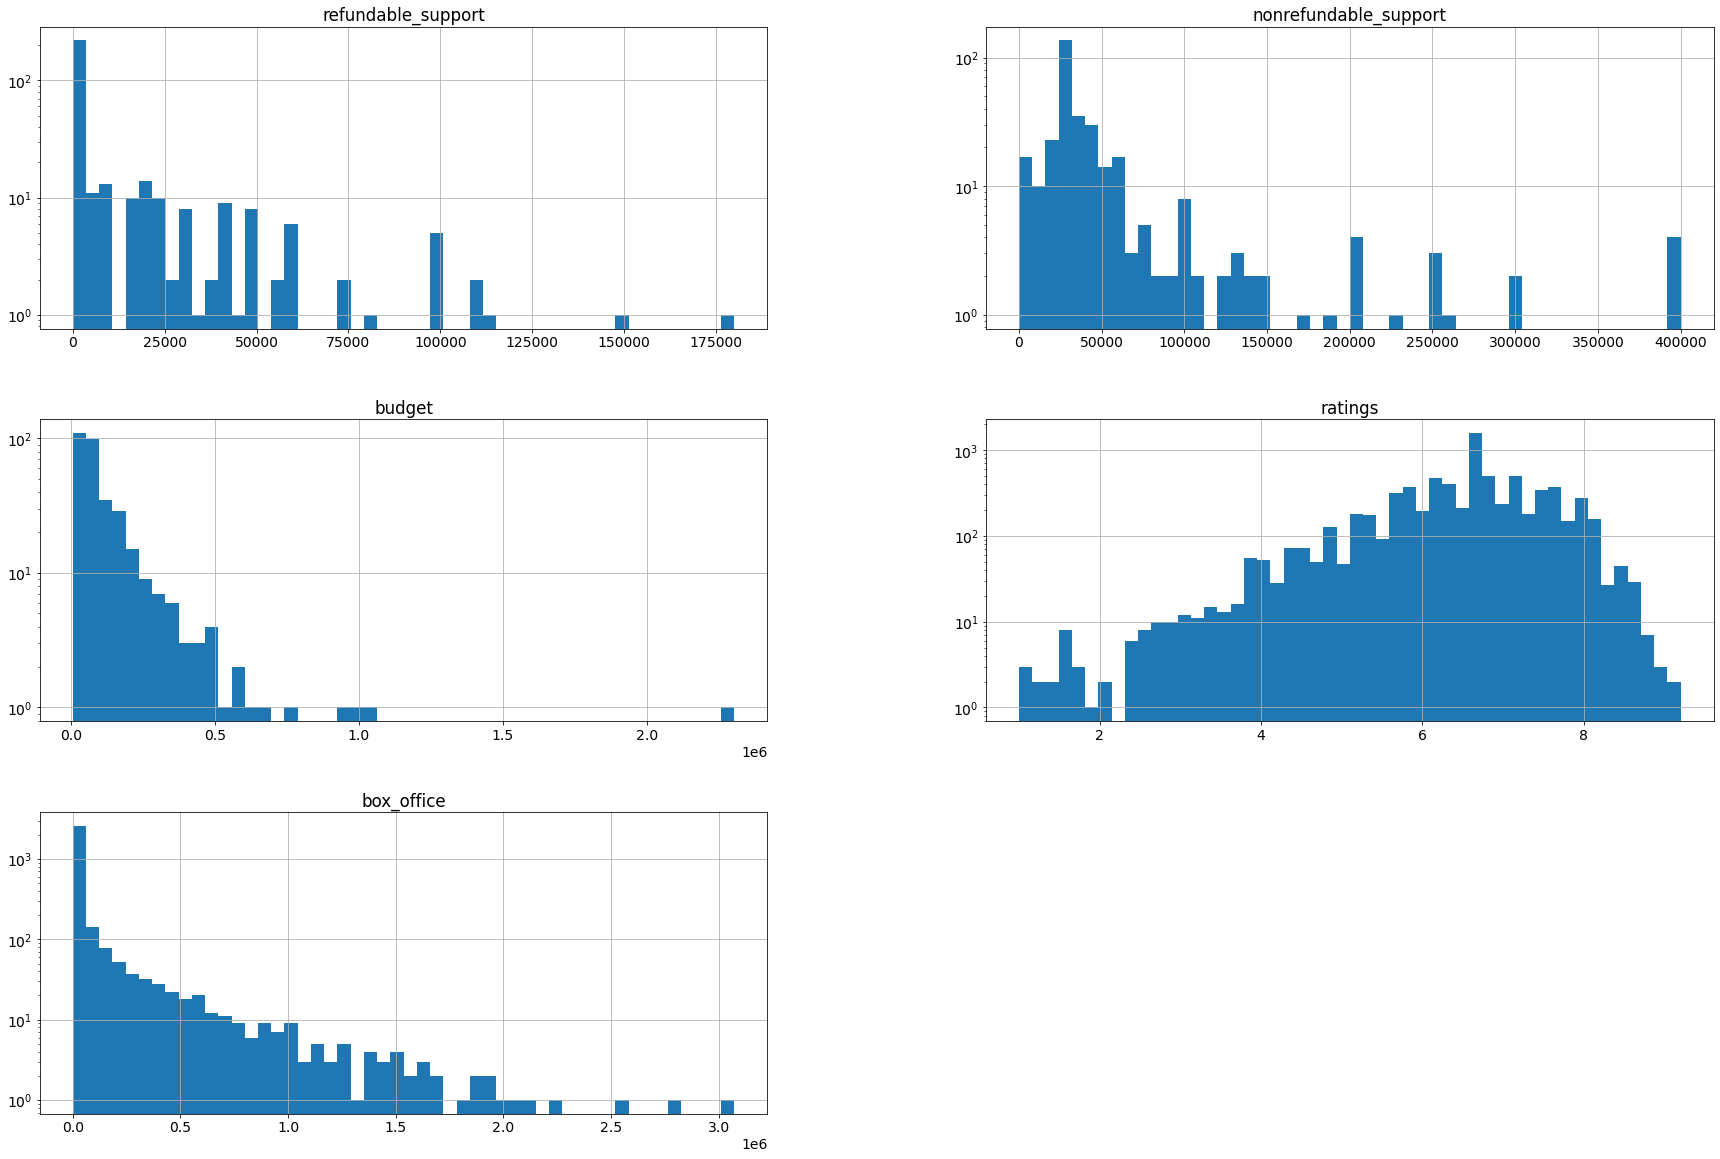

In [44]:
#оценим распределение количественных признаков и надичие выбросов
data.hist(column=['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office'], figsize=(30, 20), bins=50, log=True)

<div class="alert alert-info"> 
    
<h1>Комментарий студента</h1> 
    
Столбец `ratings` больше похож на нормальное распределение со сдвигом вправо. Сдвиг вправо может быть обусловлен тем, что понравившимся фильмам чаще ставят оценки выше заслуженных.  
Остальные столбцы демонстрируют экспоненциальное распределение - т.е. являются однотипными случайными событиями. 
Несколько выбивается из картины столбец `nonrefundable_support`, но выбросами его значения назвать нельзя, т.к. неизвестно по каким внутренним закономерностям (видимо, есть локальные акты Министерства культуры или просто воровство бюджета) распределяется данный вид поддержки. Очистить данные не представляется возможным.   

</div>

### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [45]:
data['show_start_year'] = pd.PeriodIndex(data['show_start_date']).year
data.loc[456].to_frame()

,456
title,Путешествие - 2: Таинственный остров
puNumber,121002412
show_start_date,2012-01-31
type,Художественный
film_studio,"Уорнер Бразерс, Нью Лайн Синема, Контрафилм, Уолден Медиа"
production_country,США
director,Брэд Пейтон
producer,"Трипп Винсон, Бо Флинн, Шарлотта Хаггинс"
age_restriction,«12+» - для детей старше 12 лет
refundable_support,NaN


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [46]:
#очистим данные от пропусков Nan, которые не дадут применить к себе методы строк
data['genres'].isna().sum()

973

In [47]:
#заменяем пропуски в данных 'unknown'
data['genres'] = data['genres'].fillna('unknown')

In [48]:
data['director'].isna().sum()

9

In [49]:
data['director'] = data['director'].fillna('unknown')

In [50]:
#функция разделяет строки по запятой, а затем записывает в новый столбец первое значение
def new_column(row):
    main_name = row.split(',')[0]
    return main_name

    
data['main_director'] = data['director'].apply(new_column)

data['main_genre'] = data['genres'].apply(new_column)
#проверяем
data.loc[457].to_frame()

,457
title,"Код доступа ""Кейптаун"""
puNumber,221030516
show_start_date,2016-06-21
type,Художественный
film_studio,"Юниверсал Пикчерз, Интрепид Пикчерз, Мунлайтинг Филмз, Релативити Медиа, Стубер Продакшнз"
production_country,США - ЮАР
director,Дэниэл Эспиноза
producer,"Скотт Аверсано, Скотт Стубер, Марк Д.Эванс"
age_restriction,«18+» - запрещено для детей
refundable_support,NaN


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [51]:
#добавляем столбец с отношением господдержки и бюджета
data['ratio'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [52]:
#метрики нового столбца
data['ratio'].describe().to_frame()

,ratio
count,330.00
mean,0.54
std,0.20
min,0.04
25%,0.39
50%,0.62
75%,0.66
max,1.00


## Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [53]:
#определяем количесвто всех выданных прокатных удостоверений.
print('Количество строк данных', data.shape[0])

Количество строк данных 7457


In [54]:
data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'ratio']].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratio
count,330.00,330.00,330.00,3143.00,330.00
mean,11936.36,49233.30,132053.86,76671.58,0.54
std,24974.95,60073.64,187536.65,240738.05,0.20
min,0.00,0.00,6000.00,0.00,0.04
25%,0.00,25000.00,46153.86,87.80,0.39
50%,0.00,30000.00,72448.59,2351.96,0.62
75%,15000.00,41125.00,150000.00,24138.97,0.66
max,180000.00,400000.00,2305074.30,3073568.69,1.00


Всего прокатных удостоверений было выдано 7 457. Данные о кассовых сборах есть только у 3 143 фильмов - т.е. меньше, чем у половины. Данные о господдержке имеются у 330 фильмов из общей выборки.

In [55]:
#составляем сводную таблицу по годам проката. Включаем данные об общем числе прокатных удостоверений
#и данные о кассовых сборах.
data1 = data.pivot_table(index='show_start_year', values=('puNumber', 'box_office'), aggfunc='count')
display(data1)

,box_office,puNumber
show_start_year,,
2010,105,984
2011,109,621
2012,127,591
2013,184,629
2014,278,806
2015,460,697
2016,523,813
2017,356,503
2018,474,888


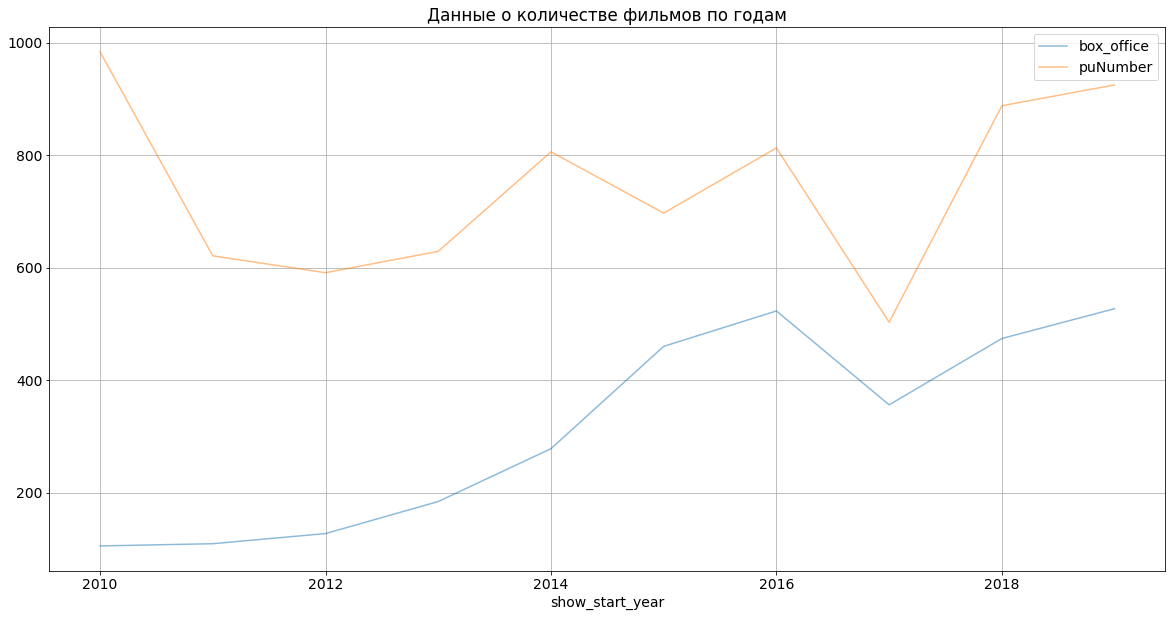

In [56]:
data1.plot(style='-', title='Данные о количестве фильмов по годам', alpha=0.5, grid=True, figsize=(20,10))
plt.show()

Начиная с 2015 года графики начинают повторять друг-друга, что может быть связано с улучшением механизма сбора данных в 2015г. В 2017г. был "провал" по количеству выданных прокатных удостоверений. Такое же снижение наблюдается в 2017г. в количестве данных о кассовых сборах фильмов. С 2010г. количество выданных прокатных удостоверений снижалось, но к 2019г. почти восстановилось до прежних значений. 

In [57]:
#добавляем новый столбец, показывающий соотношение число фильмов, собравших кассу, к общему 
#числу фильмов
data1['ratio'] = data1['box_office'] / data1['puNumber']

display(data1.sort_values('ratio', ascending=True))                      

,box_office,puNumber,ratio
show_start_year,,,
2010,105,984,0.11
2011,109,621,0.18
2012,127,591,0.21
2013,184,629,0.29
2014,278,806,0.34
2018,474,888,0.53
2019,527,925,0.57
2016,523,813,0.64
2015,460,697,0.66


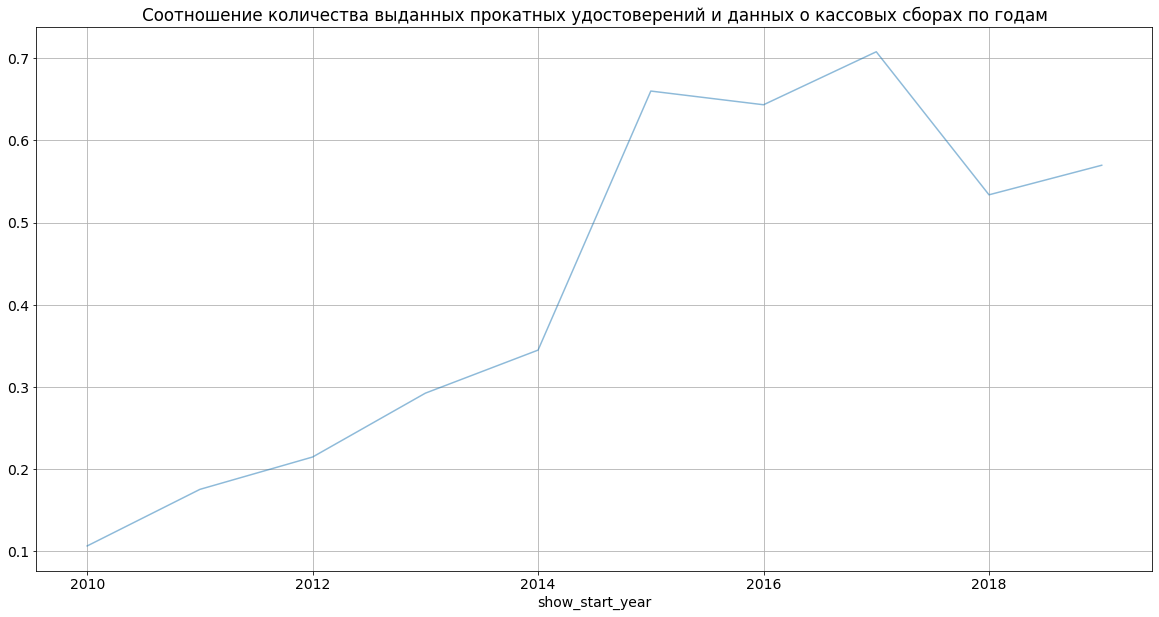

In [58]:
data1['ratio'].plot(style='-', title='Соотношение количества выданных прокатных удостоверений и данных о кассовых сборах по годам', alpha=0.5, grid=True, figsize=(20,10))
plt.show()

С 2010г. наблюдается рост количества данных о кассовых сборах фильмов, что может быть связано с улучшением механизма сбора данных. Имеется "провал" в 2018г., не восстановившийся за 2019г.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [59]:
data2 = data.pivot_table(index='show_start_year', values=('box_office'), aggfunc='sum')
display(data2.sort_values('box_office', ascending=True))

,box_office
show_start_year,
2010,2428.65
2012,6953.68
2011,14102.76
2013,29799.71
2014,7444947.56
2015,38966066.66
2016,47862924.56
2019,48421074.31
2017,48563669.26


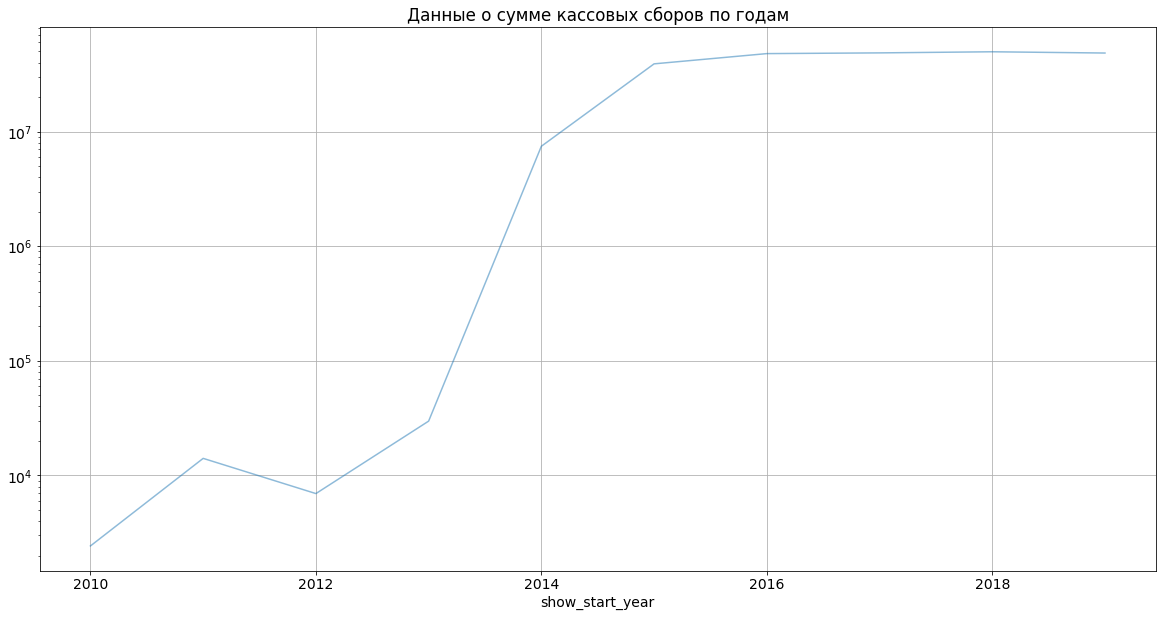

In [60]:
data2['box_office'].plot(style='-', title='Данные о сумме кассовых сборов по годам', alpha=0.5, grid=True, figsize=(20,10), logy=True)
plt.show()

Сумма кассовых сборов росла на два порядка с 2010г. по 2015г., после 2015г. находится приблизительно на одном уровне. Наибольший прирост визуализируется в 2013г. Данная динамика, скорее всего связана с механизмом получения данных.  
Минимальная сумма кассовых сборов 2 428.65 тыс. руб. была в 2010г.  
Максимальная сумма кассоых сборов 49 666 815.91 была в 2018г.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [61]:
data3 = data.pivot_table(index='show_start_year', values=('box_office'), aggfunc=('mean', 'median'))
display(data3.sort_values('mean', ascending=True))

,mean,median
show_start_year,,
2010,23.13,1.70
2012,54.75,5.76
2011,129.38,3.00
2013,161.95,3.52
2014,26780.39,18.88
2015,84708.84,5003.45
2016,91516.11,4000.81
2019,91880.60,4732.61
2018,104782.31,8911.53


In [62]:
display(data3.sort_values('median', ascending=True))

,mean,median
show_start_year,,
2010,23.13,1.70
2011,129.38,3.00
2013,161.95,3.52
2012,54.75,5.76
2014,26780.39,18.88
2016,91516.11,4000.81
2019,91880.60,4732.61
2015,84708.84,5003.45
2018,104782.31,8911.53


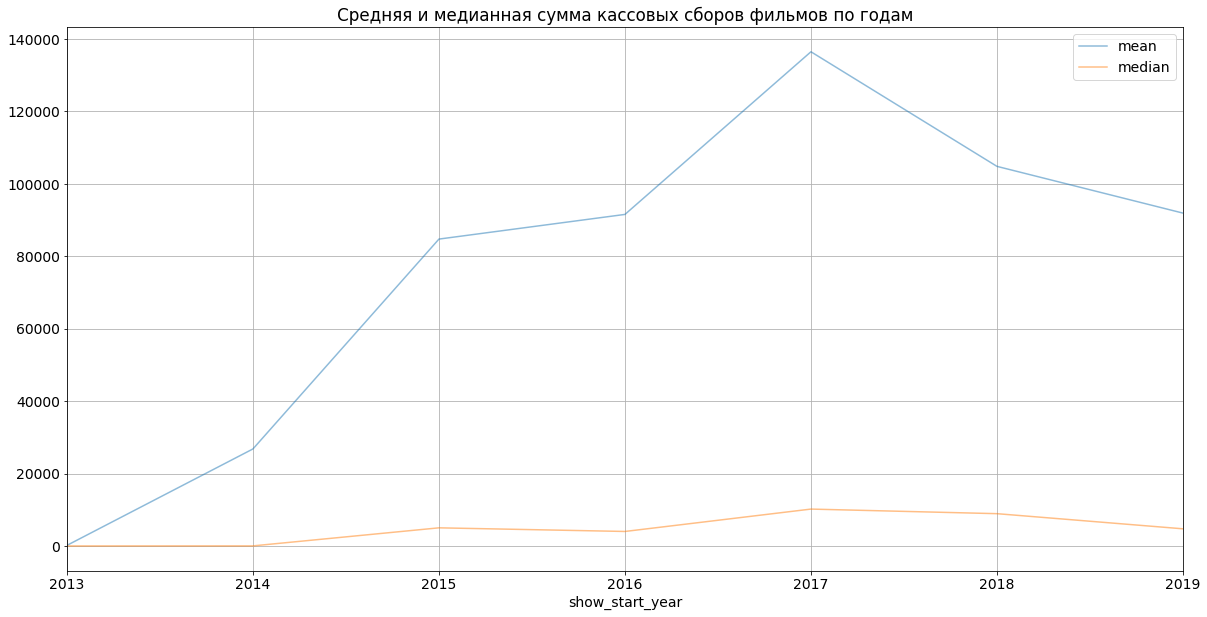

In [63]:
data3.plot(style='-', title='Средняя и медианная сумма кассовых сборов фильмов по годам', alpha=0.5, grid=True, figsize=(20,10))
plt.xlim([2013, 2019])
plt.show()

Имеется очень большой разброс данных между средними и медианными значениями, начиная с 2013г. Это вызвано тем, что некоторые фильмы дают очень большие кассовые сбора по сравнению с остальными. Самые большие средние и медианные кассовые сборы фиксируем в 2017г. Затем значения незначительно снижаются.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [64]:
data.query('2015 <= show_start_year').groupby('age_restriction')['box_office'].sum().sort_values().to_frame()

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,809077.43
«18+» - запрещено для детей,40753306.15
«6+» - для детей старше 6 лет,55269508.50
«12+» - для детей старше 12 лет,60619408.67
«16+» - для детей старше 16 лет,76029249.96


In [65]:
#для большей наглядности переводим данные в млн.руб.
data4 = data.query('2015 <= show_start_year').groupby('age_restriction')['box_office'].sum().sort_values().reset_index()
data4['box_office'] = data4['box_office'].apply(lambda x: x / 1000)
display(data4)

,age_restriction,box_office
0,«0+» - для любой зрительской аудитории,809.08
1,«18+» - запрещено для детей,40753.31
2,«6+» - для детей старше 6 лет,55269.51
3,«12+» - для детей старше 12 лет,60619.41
4,«16+» - для детей старше 16 лет,76029.25


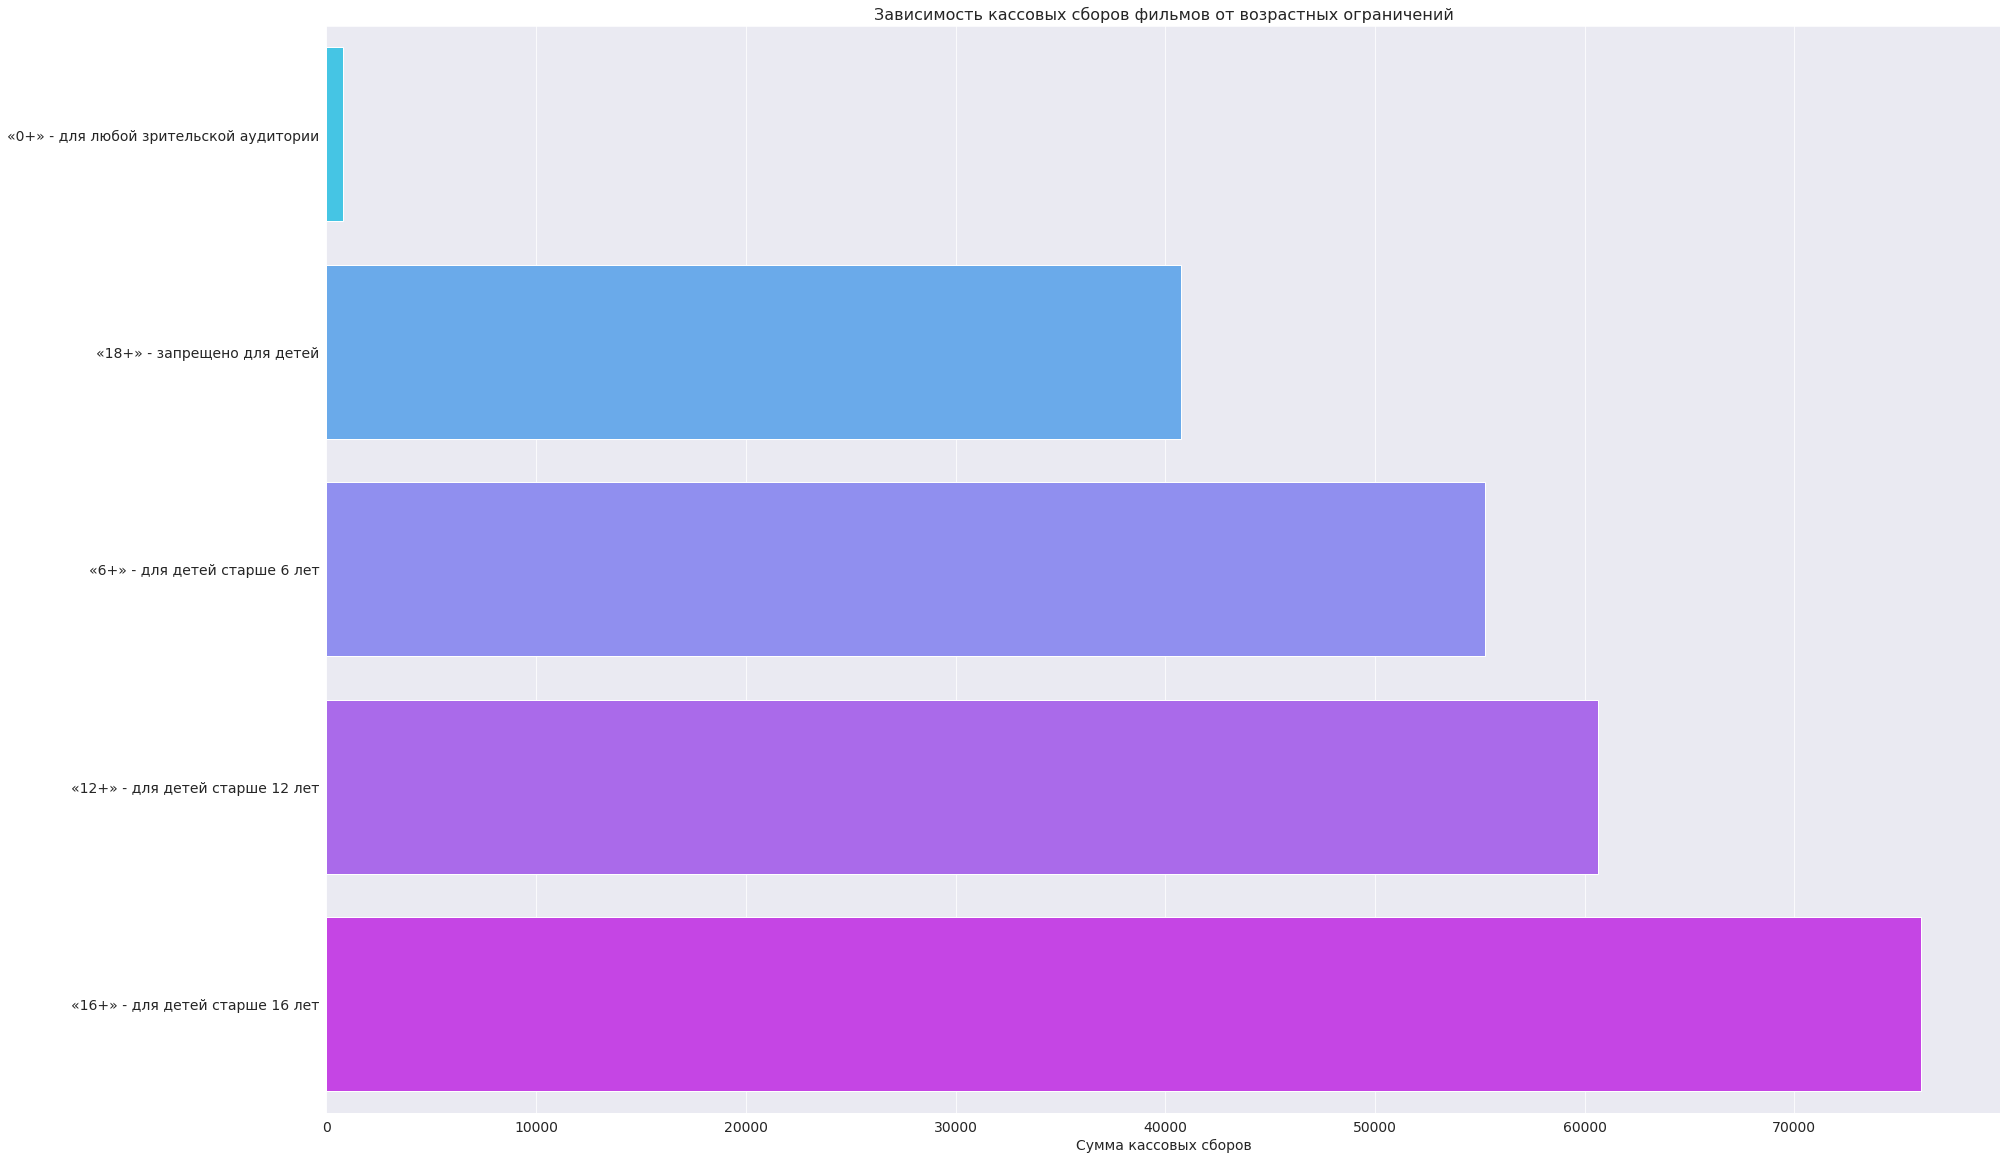

In [66]:
plt.figure(figsize=(30, 20))
sns.set_style("darkgrid")
sns.barplot(data=data4, x='box_office', y='age_restriction', palette = 'cool')
plt.title('Зависимость кассовых сборов фильмов от возрастных ограничений', fontsize=16)
plt.xlabel('Сумма кассовых сборов', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()

Кассовые сборы максимальны для категории "16+". Минимум демонстрирует категория "0+"

In [67]:
data5 = data.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').to_frame()
data5['box_office'] = data5['box_office'].apply(lambda x: x / 1000)
display(data5)

box_office
show_start_year age_restriction                                   
2015            «0+» - для любой зрительской аудитории      379.05
                «12+» - для детей старше 12 лет           13616.08
                «16+» - для детей старше 16 лет           11367.32
                «18+» - запрещено для детей                5430.88
                «6+» - для детей старше 6 лет              8172.73
2016            «0+» - для любой зрительской аудитории      150.23
                «12+» - для детей старше 12 лет           12204.45
                «16+» - для детей старше 16 лет           16664.47
                «18+» - запрещено для детей                6790.64
                «6+» - для детей старше 6 лет             12053.15
2017            «0+» - для любой зрительской аудитории      229.60
                «12+» - для детей старше 12 лет            7851.39
                «16+» - для детей старше 16 лет           18745.04
                «18+» - запрещено для детей                9651.50
                «6+» - для детей старше 6 лет             12086.14
2018            «0+» - для любой зрительской аудитории       32.45
                «12+» - для детей старше 12 лет           14267.29
                «16+» - для детей старше 16 лет           16503.60
                «18+» - запрещено для детей                8758.50
                «6+» - для детей старше 6 лет             10104.97
2019            «0+» - для любой зрительской аудитории       17.75
                «12+» - для детей старше 12 лет           12680.20
                «16+» - для детей старше 16 лет           12748.82
                «18+» - запрещено для детей               10121.80
                «6+» - для детей старше 6 лет             12852.51

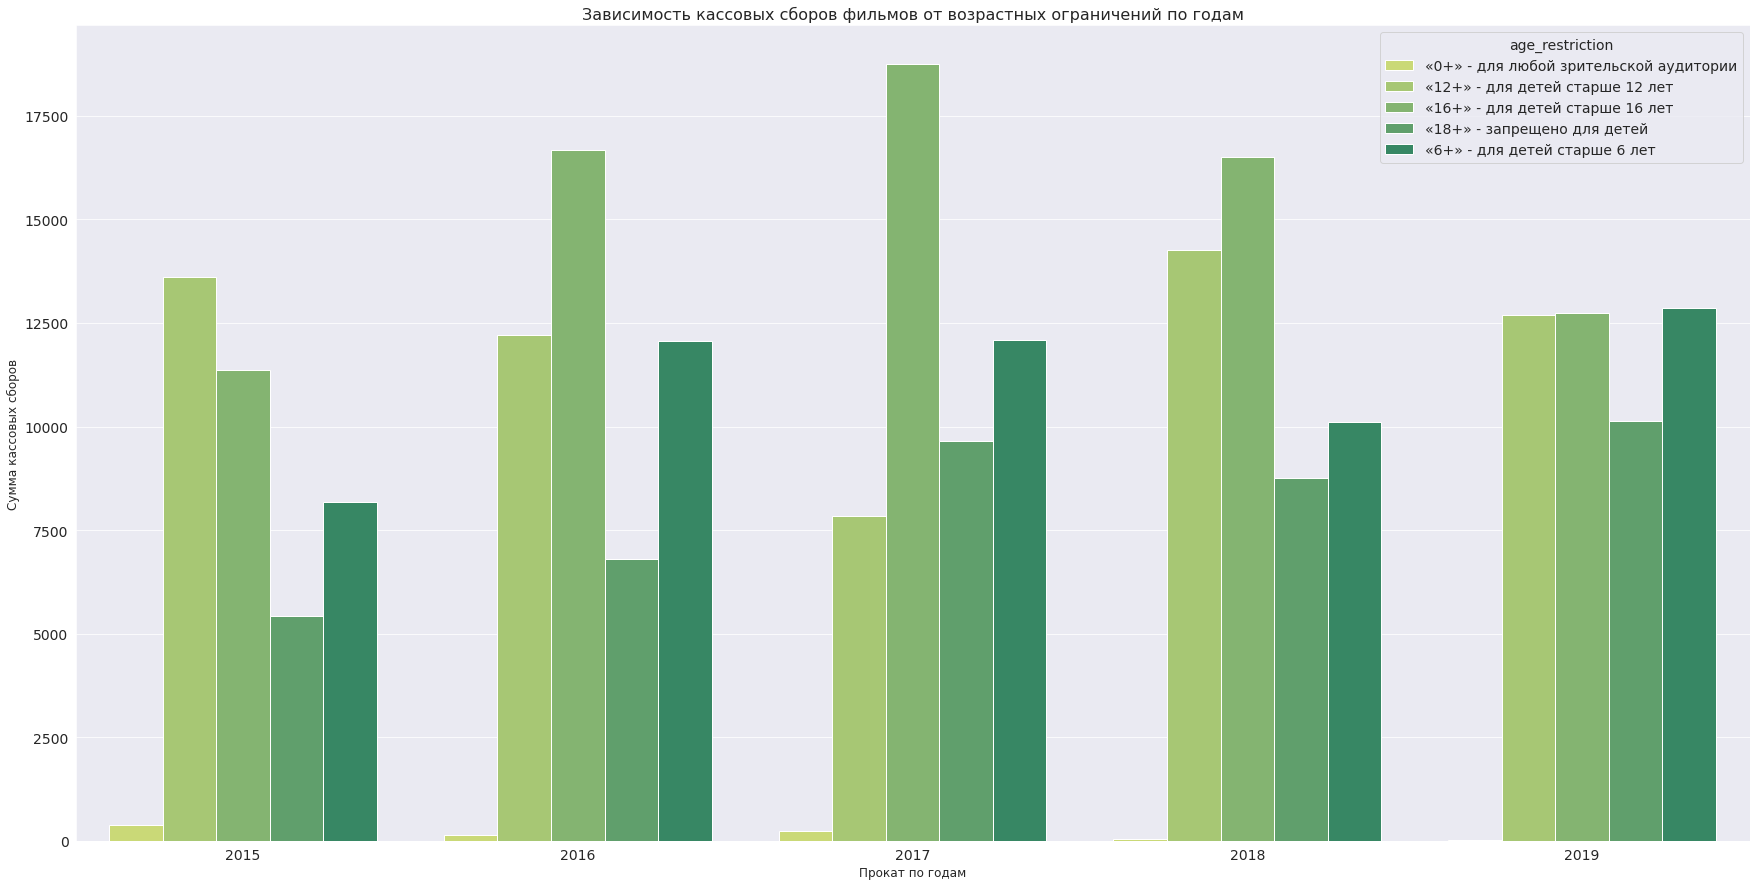

In [68]:
data6 = data.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()
data6['box_office'] = data6['box_office'].apply(lambda x: x / 1000)
plt.figure(figsize=(30, 15))
sns.barplot(data=data6, x='show_start_year', y='box_office', hue='age_restriction', palette = 'summer_r')
plt.title('Зависимость кассовых сборов фильмов от возрастных ограничений по годам', fontsize=16)
plt.xlabel('Прокат по годам', fontsize=12)
plt.ylabel('Сумма кассовых сборов', fontsize=12)
plt.show()

Тенденция сохраняется во все годы, кроме 2015, когда максимум сборов продемонстрировала категория "12+". В 2019г. все категории, кроме "0+" продемонстрировали в целом, равное количество кассовых сборов. Чуть ниже в 2019г. категория "16+". В последние два года наблюдается тенденция на снижение кассовых сборов фильмов категории "16+".

<div class="alert alert-info"> 
    
<h1>Комментарий студента</h1> 
    
Не удалось сгруппировать столбцы гистограммы и данные легенды по порядку. Категория "6+" - неубиваемо переносится в конец. По крайней мере, добавление 0 перед цифрой 6 - без эффекта. Непонятно - как она сортируется?

</div>

In [69]:
# код ревьюера
lst = ['0', '1', '9', '12']
print(sorted(lst))

print(sorted(lst, key=lambda x: int(x)))

['0', '1', '12', '9']
['0', '1', '9', '12']


## Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

По условиям заказчика, Министерства культуры Российской Федерации, нужно ответить на вопрос, насколько фильмы, которые получили государственную поддержку интересны зрителю.  
С этой целью проведем исследования трех групп фильмов: 
1. зарубежные;
2. произведенные в России/с российским участием;
3. получившие господдержку.

In [70]:
#делаем выборку зарубежных фильмов
data_imp = data.loc[~data['production_country'].str.contains("Россия")]
print('Количество зарубежных фильмов:', len(data_imp), 'шт.')
display(data_imp.head(3))

Количество зарубежных фильмов: 5490 шт.


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,ratio
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN


In [71]:
#делаем выборку фильмов, произведенных в России/с российским участием
data_rus = data.loc[data['production_country'].str.contains("Россия")]
print('Количество фильмов, произведенных в России/с российским участием:', len(data_rus), 'шт.')
display(data_rus.head(3))

Количество фильмов, произведенных в России/с российским участием: 1967 шт.


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,ratio
61,Американская дочь,111005515,2015-04-23,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"", Роскомкино, киностудия ""Курьер"" киноконцерна ""Мосфильм""","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"драма,комедия",0.30,2015,К.Шахназаров,драма,NaN
310,Фара,211040615,2015-09-10,Художественный,"ЗАО Студия ""Эй-Би-Эй"", Национальный продюсерский центр республики Казахстан",Россия - Казахстан,А.Карпыков,Б.Айрапетян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.60,"триллер,драма",NaN,2015,А.Карпыков,триллер,NaN
335,Каникулы строгого режима,111008514,2014-08-07,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.10,"драма,комедия,приключения",0.36,2014,И.Зайцев,драма,NaN


Зарубежный    5490
Российский    1967
Name: production_country, dtype: int64

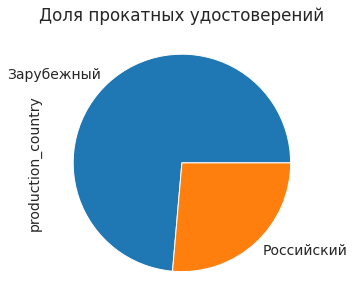

In [72]:
#визуализируем
country = np.where((data['production_country'].str.contains("Россия")) == True , 'Российский', 'Зарубежный')
pie_chart = data.groupby(country)['production_country'].count()
display(pie_chart)
pie_chart.plot(kind='pie', title='Доля прокатных удостоверений',  figsize=(5,5))
plt.show()

In [73]:
#определяем количество российских и зарубежных фильмов, имеющих данные о кассовых сборах.
country_box_office = np.where((data['production_country'].str.contains("Россия")) == True & (data['box_office'] > 0) , 'Российский', 'Зарубежный')
pie_chart1 = data.groupby(country_box_office)['box_office'].count()
display(pie_chart1)

Зарубежный    2289
Российский     854
Name: box_office, dtype: int64

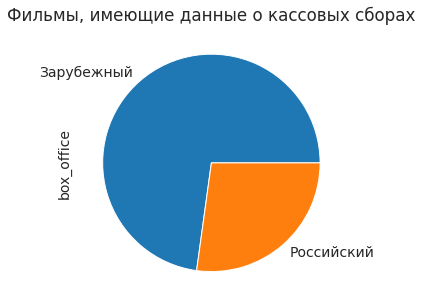

In [74]:
#визуализируем
pie_chart1.plot(kind='pie', title='Фильмы, имеющие данные о кассовых сборах',  figsize=(5,5))
plt.show()

Как видно из диаграмм, доля российских и зарубежных фильмов, получивших прокатные удостоверения и их же -  имеющих данные о кассовых сборах, примерно одинаковая. Значит, выборки являются репрезентативными. Это позволяет анализировать эти группы с большой степенью достоверности дальше.

In [75]:
#создаем новый датафрейм, куда отфильтровываем данные о фильмах с господдержкой
data_help = data[data['budget'].notna()].reset_index(drop=True)
print('Количество фильмов, получивших господдержку:', len(data_help), 'шт.')
display(data_help.head(3))
display(data_help.loc[0].to_frame())

Количество фильмов, получивших господдержку: 330 шт.


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,ratio
0,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-Фильм"", ООО ""Кинокомпания Отражение""",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500.00,79411.90,Министерство культуры,8.10,"драма,мелодрама",365.35,2013,А.Атанесян,драма,0.33
1,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000.00,37142.86,Министерство культуры,6.60,unknown,28.14,2014,А.Якимчук,unknown,0.70
2,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847.95,176023.49,Фонд кино,5.30,"комедия,фантастика",19957.03,2013,Р.Давлетьяров,комедия,0.61


,0
title,Пока еще жива
puNumber,111005313
show_start_date,2013-10-11
type,Художественный
film_studio,"АНО содействия развитию кинематографии ""Ангел-Фильм"", ООО ""Кинокомпания Отражение"""
production_country,Россия
director,А.Атанесян
producer,"А.Атанесян, М.Бабаханов, Р.Бутко"
age_restriction,«16+» - для детей старше 16 лет
refundable_support,0.00


In [76]:
#определяем количество фильмов с господдержкой, имеющих данные о кассовых сборах.
budget_box_office = np.where((data['budget'] > 0) & (data['box_office'] > 0) , 'Кассовые сборы есть', 'Нет информации')
pie_chart2 = data.groupby(budget_box_office)['budget'].count()
display(pie_chart2)

Кассовые сборы есть    316
Нет информации          14
Name: budget, dtype: int64

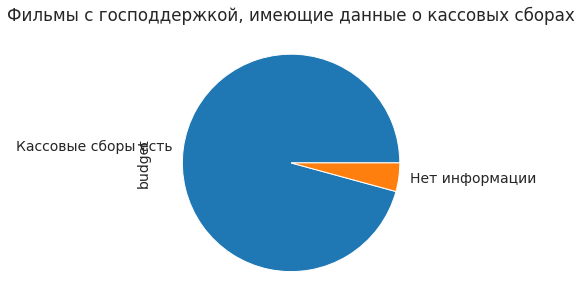

In [77]:
#визуализируем
pie_chart2.plot(kind='pie', title='Фильмы с господдержкой, имеющие данные о кассовых сборах',  figsize=(5,5))
plt.show()

Выборка также будет репрезентативной.

In [78]:
#исследуем метрики кассовых сборов зарубежных фильмов
data_imp['box_office'].describe().to_frame()

,box_office
count,2292.00
mean,82157.42
std,245653.72
min,0.00
25%,185.19
50%,2913.60
75%,25903.99
max,2576613.78


Среднее арифметическое кассовых сборов зарубежных фильмов - **82 157 тыс.руб.** Медиана - **2 913 тыс.руб.** - выражено влияние фильмов, принесших максимальную прибыль.

In [79]:
#Зарубежный фильм, принесший максимальную выручку
display(data_imp[data_imp['box_office'] == data_imp['box_office'].max()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,ratio
6794,Мстители: Финал,121005519,2019-04-29,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"фантастика,боевик,драма",2576613.78,2019,Джо Руссо,фантастика,NaN


Самый кассовый зарубежный фильм принес в прокате **2 576 613 тыс.руб**, произведен в США в жанре "фантастика", имеет возрастное ограничение "16+".

In [80]:
print('Количество фильмов из четвертого квартиля', len(data_imp[data_imp['box_office'] > 25903.99]))
print('Количество фильмов принесших более 1 млрд. руб.', len(data_imp[data_imp['box_office'] > 1000000]))

Количество фильмов из четвертого квартиля 573
Количество фильмов принесших более 1 млрд. руб. 46


In [81]:
#пять зарубежных фильмов с наибольшей выручкой
display(data_imp[data_imp['box_office'].notna()].sort_values(by='box_office').tail())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,ratio
6251,Веном,121022018,2018-10-04,Художественный,"Коламбиа Пикчерз, Марвел Интертейнмент, Паскаль Пикчерз, Сони Пикчерз Интертейнмент, Тенсент Пикчерз",США,Рубен Флейшер,"Ави Арад, Эми Паскаль, Мэтт Толмак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"боевик,фантастика,триллер",1913257.92,2018,Рубен Флейшер,боевик,NaN
3738,Тайная жизнь домашних животных. Миньоны против газона,124002816,2016-07-05,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,Крис Рено,Кристофер Меледандри,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.70,"мультфильм,короткометражка,комедия",1971005.08,2016,Крис Рено,мультфильм,NaN
2848,Зверополис,124000316,2016-02-15,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.30,"мультфильм,комедия,криминал",2048126.11,2016,Рич Мур,мультфильм,NaN
3473,Пираты Карибского моря: Мертвецы не рассказывают сказки,121009217,2017-05-17,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, Инфинитум Нихил",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.60,"фэнтези,боевик,комедия",2118396.12,2017,Йоаким Реннинг,фэнтези,NaN
6794,Мстители: Финал,121005519,2019-04-29,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"фантастика,боевик,драма",2576613.78,2019,Джо Руссо,фантастика,NaN


In [82]:
#Зарубежные фильмы, принесшие выручку по жанрам
data_imp.loc[(data_imp['box_office'].notna()), 'main_genre'].value_counts()

драма              493
мультфильм         275
ужасы              241
боевик             203
комедия            203
триллер            179
фантастика         156
unknown            126
фэнтези            121
документальный      85
мелодрама           72
аниме               32
приключения         20
биография           17
мюзикл              14
криминал            13
детектив            13
история              7
семейный             6
вестерн              4
военный              4
концерт              2
музыка               2
спорт                1
фильм-нуар           1
короткометражка      1
для взрослых         1
Name: main_genre, dtype: int64

In [83]:
#зарубежные фильмы, принесшие в прокате выручку более 1 млрд.руб. по жанрам
data_imp.loc[(data_imp['box_office'] > 1000000), 'main_genre'].value_counts()

фантастика     15
фэнтези         9
мультфильм      9
боевик          5
ужасы           2
приключения     1
биография       1
триллер         1
история         1
аниме           1
драма           1
Name: main_genre, dtype: int64

Среди наиболее кассовых зарубежных фильмов с огромным отрывом лидируют фильмы в жанре "фантастика" и "фэнтези".

In [84]:
#зарубежные фильмы из четвертого квартиля по кассовым сборам, в разбивке по жанрам.
data_imp.loc[(data_imp['box_office'] > 25903.99), 'main_genre'].value_counts()

боевик            90
фантастика        83
ужасы             83
мультфильм        75
драма             64
триллер           48
фэнтези           41
комедия           30
unknown           19
мелодрама         11
биография          5
детектив           5
мюзикл             5
аниме              4
криминал           2
военный            2
семейный           1
история            1
спорт              1
приключения        1
вестерн            1
документальный     1
Name: main_genre, dtype: int64

Данные по фильмам из четвертого квартиля значительно отличаются - на первом месте жанры "боевик" и "ужасы". Жанр "фантастика" только на третьем месте.

In [85]:
#проведем исследование фильмов из последнего квартиля по возрастным ограничениям
data_imp.loc[(data_imp['box_office'] > 25903.99), 'age_restriction'].value_counts()

«18+» - запрещено для детей               205
«16+» - для детей старше 16 лет           199
«6+» - для детей старше 6 лет             100
«12+» - для детей старше 12 лет            66
«0+» - для любой зрительской аудитории      3
Name: age_restriction, dtype: int64

In [86]:
#проведем исследование заркбежных фильмов, собравших в прокате более 1 млрд. руб. по возрастным ограничениям
data_imp.loc[(data_imp['box_office'] > 1000000), 'age_restriction'].value_counts()

«12+» - для детей старше 12 лет    16
«16+» - для детей старше 16 лет    11
«6+» - для детей старше 6 лет      11
«18+» - запрещено для детей         8
Name: age_restriction, dtype: int64

Данные фильмов из четвертого квартиля снова противоречат данным наиболее кассовых фильмов. В фильмах из четвертого квартиля лидируют категории "18+" и "16+", но наибольшую кассу собирают фильмы для детей: "12+" и "6+"

In [87]:
#проведем исследование зарубежных фильмов из последнего квартиля по стране производства
data_imp.loc[(data_imp['box_office'] > 25903.99), 'production_country'].value_counts()

США                                                               347
Франция                                                            16
США - Великобритания                                               14
Великобритания                                                     12
Великобритания - США                                                9
США - Канада                                                        6
США - КНР                                                           6
США - Австралия                                                     5
Япония                                                              4
Великобритания-США                                                  4
Великобритания - Франция                                            3
Канада - США                                                        3
КНР - США                                                           3
Испания                                                             3
США - Испания       

С огромным отрывом в производстве кассовых фильмов лидирует США. Что неудивительно.

In [88]:
#проведем исследование зарубежных фильмов, собравших в прокате более 1 млрд. руб. по стране производства
data_imp.loc[(data_imp['box_office'] > 1000000), 'production_country'].value_counts()

США                                    34
США - Великобритания                    3
США - Канада                            2
США - Великобритания - КНР              1
США - Великобритания - Канада - КНР     1
США - Испания                           1
Великобритания - США                    1
США - Австралия                         1
США - Канада - Япония - КНР             1
США, Франция, Япония                    1
Name: production_country, dtype: int64

Снова США. В 100% случаев.

In [89]:
#исследуем метрики кассовых сборов российских фильмов
data_rus['box_office'].describe().to_frame()

,box_office
count,851.00
mean,61896.57
std,226448.64
min,0.00
25%,28.07
50%,977.48
75%,19523.96
max,3073568.69


Среднее арифметическое кассовых сборов российских фильмов - **61 896 тыс.руб**. Медиана - **977 тыс.руб.** - выражено влияние фильмов, принесших максимальную прибыль. Если среднее арифметическое сопоставимо с зарубежными фильмами (82 157 тыс.руб.), то медиана 977 тыс.руб. отличается в 3 раза (2 913 тыс.руб. у зарубежных фильмов). Т.е. зарубежные фильмы дают выручку большую, чем российские.

In [90]:
#исследуем метрики кассовой выручки фильмов с господдержкой
data_help['box_office'].describe().to_frame()

,box_office
count,316.00
mean,133267.00
std,335733.73
min,1.55
25%,1272.65
50%,16390.50
75%,106934.53
max,3073568.69


Среднее арифметическое кассовых сборов фильмов с господдержкой - **133 267 тыс.руб.** против 896 тыс.руб в общей выборке российских фильмов. Медиана - **16 390 тыс.руб** против 977 тыс.руб. в общей выборке российских фильмов. Среднее арифметическое фильмов с господдержкой лучше, чем у зарубежных фильмов (82 157 тыс.руб.). Медиана  выручки фильмов с господдержкой  также лучше, чем 2 913 тыс.руб. у зарубежных фильмов. Т.е. в целом фильмы с господдержкой дают выручку лучше, чем российские фильмы без господдержки и даже лучше, чем зарубежные фильмы.

In [91]:
#российский фильм, принесший максимальную выручку
display(data_rus[data_rus['box_office'] == data_rus['box_office'].max()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,ratio
7427,Холоп,111021719,2019-12-19,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзиев, В.Шляппо, А.Троцюк, Р.Минасбекян, В.Верещагин, А.Кушаев",«12+» - для детей старше 12 лет,25000.00,35000.00,160000.00,Фонд кино,6.80,комедия,3073568.69,2019,К.Шипенко,комедия,0.38


In [92]:
#российский фильм с господдержкой, принесший максимальную выручку
display(data_help[data_help['box_office'] == data_help['box_office'].max()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,ratio
324,Холоп,111021719,2019-12-19,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзиев, В.Шляппо, А.Троцюк, Р.Минасбекян, В.Верещагин, А.Кушаев",«12+» - для детей старше 12 лет,25000.00,35000.00,160000.00,Фонд кино,6.80,комедия,3073568.69,2019,К.Шипенко,комедия,0.38


Самый кассовый российский фильм произведен с господдержкой и принес **3 073 568 тыс.руб**. Жанр - "комедия", возрастное ограничение "12+". Самый кассовый зарубежный фильм принес 2 576 613 тыс.руб.

In [93]:
print('Количество российских фильмов из четвертого квартиля', len(data_rus[data_rus['box_office'] > 19523.99]))
print('Количество фильмов с господдержкой из четвертого квартиля', len(data_help[data_help['box_office'] > 106934.99]))

print('Количество российских фильмов принесших более 1 млрд. руб.', len(data_rus[data_rus['box_office'] > 1000000]))
print('Количество фильмов с господдержкой принесших более 1 млрд. руб.', len(data_help[data_help['box_office'] > 1000000]))

Количество российских фильмов из четвертого квартиля 213
Количество фильмов с господдержкой из четвертого квартиля 79
Количество российских фильмов принесших более 1 млрд. руб. 9
Количество фильмов с господдержкой принесших более 1 млрд. руб. 7


Количество зарубежных фильмов из четвертого квартиля - 573. Количество  зарубежных фильмов принесших более 1 млрд. руб. - 46. Количество российских фильмов из четвертого квартиля сопоставимо с количеством зарубежных фильмов. Но всего 9 российских фильмов собрали в прокате более 1 млрд.руб. Большинство из них произведены с господдержкой.

In [94]:
#российские фильмы, принесшие выручку по жанрам
data_rus.loc[(data_rus['box_office'].notna()), 'main_genre'].value_counts()

драма             198
комедия           168
unknown           120
мультфильм         64
мелодрама          46
триллер            37
боевик             33
ужасы              26
фэнтези            22
детский            19
военный            18
фантастика         16
приключения        15
документальный     14
история            12
семейный           12
детектив            8
спорт               5
мюзикл              5
криминал            5
биография           4
реальное ТВ         1
музыка              1
аниме               1
вестерн             1
Name: main_genre, dtype: int64

In [95]:
#фильмы с господдержкой, принесшие выручку по жанрам
data_help.loc[(data_help['box_office'].notna()), 'main_genre'].value_counts()

драма          86
комедия        73
мультфильм     30
unknown        15
триллер        15
мелодрама      14
фэнтези        11
ужасы          10
фантастика      9
военный         9
боевик          6
семейный        6
приключения     6
детектив        5
история         4
мюзикл          4
детский         3
биография       3
спорт           3
криминал        3
реальное ТВ     1
Name: main_genre, dtype: int64

Большинство российских фильмов, собравших кассу, относится к жанру "драма" и "комедия". Данные совпадают с фильмами с господдержкой.

In [96]:
#российские фильмы из четвертого квартиля по кассовым сборам, в разбивке по жанрам.
data_rus.loc[(data_rus['box_office'] > 19523.96), 'main_genre'].value_counts()

комедия           71
драма             34
мультфильм        28
триллер           11
ужасы             10
боевик             8
военный            7
фантастика         6
фэнтези            6
семейный           5
история            5
приключения        5
детектив           4
биография          3
спорт              2
криминал           2
документальный     1
музыка             1
реальное ТВ        1
мюзикл             1
unknown            1
мелодрама          1
Name: main_genre, dtype: int64

In [97]:
#фильмы  с господдержкой из четвертого квартиля по кассовым сборам, в разбивке по жанрам.
data_help.loc[(data_help['box_office'] > 106934.53), 'main_genre'].value_counts()

комедия        22
мультфильм     14
драма          13
приключения     3
военный         3
фантастика      3
семейный        3
история         3
фэнтези         3
боевик          2
ужасы           2
спорт           2
биография       2
триллер         2
unknown         1
криминал        1
Name: main_genre, dtype: int64

В обоих выборках первое место занимает жанр "комедия", второе и третье место делят жанры "драма" и "мультфильм". Наиболее кассовые зарубежные фильмы сняты в жанрах "фантастика", "ужасы" и "боевик". Данное различие может быть объяснено уровнем затрат, который могут себе позволить страны. Затраты на спецэффекты в жанрах "фантастика", "ужасы" и "боевик" значительно выше. Кроме того, аппаратура и программное обеспечение мспользующиеся в американских фильмах, часто не имеют аналогов в кинопроизводстве других стран. Подобная ситуация, исходя из представленных данных во всех без исключения странах мира, не только в России.

In [98]:
#российские фильмы, принесшие в прокате выручку более 1 млрд.руб. по жанрам
data_rus.loc[(data_rus['box_office'] > 1000000), 'main_genre'].value_counts()

комедия       4
драма         2
спорт         1
фантастика    1
unknown       1
Name: main_genre, dtype: int64

In [99]:
#российские фильмы, принесшие в прокате выручку более 1 млрд.руб. по жанрам
data_help.loc[(data_help['box_office'] > 1000000), 'main_genre'].value_counts()

комедия       2
драма         2
спорт         1
фантастика    1
unknown       1
Name: main_genre, dtype: int64

Только две российские комедии, принесшие в прокате больше 1 млрд. руб. были сняты без господдержки. Видимо, фильмы, прошедшие государственный отбор, более качественные и имеют более профессиональную команду.

In [100]:
#проведем исследование  российских фильмов из последнего квартиля по возрастным ограничениям
data_rus.loc[(data_rus['box_office'] > 19523.96), 'age_restriction'].value_counts()

«16+» - для детей старше 16 лет           72
«12+» - для детей старше 12 лет           69
«6+» - для детей старше 6 лет             45
«18+» - запрещено для детей               23
«0+» - для любой зрительской аудитории     4
Name: age_restriction, dtype: int64

In [101]:
# российские фильмы, собравшие в прокате более 1 млрд. руб. по возрастным ограничениям
data_rus.loc[(data_rus['box_office'] > 1000000), 'age_restriction'].value_counts()

«12+» - для детей старше 12 лет    6
«6+» - для детей старше 6 лет      2
«16+» - для детей старше 16 лет    1
Name: age_restriction, dtype: int64

In [102]:
#проведем исследование  российских фильмов  с господдержкой из последнего квартиля по возрастным ограничениям
data_help.loc[(data_help['box_office'] > 106934.53), 'age_restriction'].value_counts()

«12+» - для детей старше 12 лет           33
«6+» - для детей старше 6 лет             25
«16+» - для детей старше 16 лет           18
«0+» - для любой зрительской аудитории     2
«18+» - запрещено для детей                1
Name: age_restriction, dtype: int64

In [103]:
#фильмы с господдержкой, собравших в прокате более 1 млрд. руб. по возрастным ограничениям
data_help.loc[(data_help['box_office'] > 1000000), 'age_restriction'].value_counts()

«12+» - для детей старше 12 лет    5
«6+» - для детей старше 6 лет      2
Name: age_restriction, dtype: int64

In [104]:
#фильмы с господдержкой по возрастным ограничениям
data_help.loc[(data_help['box_office'] > 0), 'age_restriction'].value_counts()

«16+» - для детей старше 16 лет           119
«12+» - для детей старше 12 лет           100
«6+» - для детей старше 6 лет              64
«18+» - запрещено для детей                28
«0+» - для любой зрительской аудитории      5
Name: age_restriction, dtype: int64

Государство вкладывает деньги в фильмы для детей. Только один фильм из четвертого квартиля относится к категории "запрещено для детей". Абсолютное большинство из выборки фильмов с господдержкой также разрешены для детей. Наиболее кассовые фильмы c господдержкой также разрешены к просмотру детям.

In [105]:
#фильмы с господдержкой из четвертого квартиля по соотношению госзатрат к общему бюджету
data_help.loc[(data_help['box_office'] > 106934.53), 'ratio'].value_counts(bins=4)

(0.283, 0.522]     34
(0.522, 0.761]     26
(0.0421, 0.283]    13
(0.761, 1.0]        6
Name: ratio, dtype: int64

В четвертом квартиле только 6 фильмов имеют более 75% господдержки. Большинство фильмов этой выборки имеет от 25 до 50% господдержки.

In [106]:
#добавляем столбец с данными об общей прибыльности (или убыточности) фильма
data_help = data_help.assign(profit = data_help.box_office - (data_help.budget - data_help.refundable_support))
#добавляем столбец с общей суммой господдержки
data_help = data_help.assign(total_support = data_help.refundable_support + data_help.nonrefundable_support	)
display(data_help.loc[0].to_frame())

,0
title,Пока еще жива
puNumber,111005313
show_start_date,2013-10-11
type,Художественный
film_studio,"АНО содействия развитию кинематографии ""Ангел-Фильм"", ООО ""Кинокомпания Отражение"""
production_country,Россия
director,А.Атанесян
producer,"А.Атанесян, М.Бабаханов, Р.Бутко"
age_restriction,«16+» - для детей старше 16 лет
refundable_support,0.00


In [107]:
#состтавляем сводную таблицу режиссеров по величине прибыли/убыточности их фильмов
data_help.pivot_table(index='main_director', values='profit', aggfunc='sum').sort_values(by='profit', ascending = False)

,profit
main_director,
К.Шипенко,3147841.55
А.Мегердичев,2189493.95
Д.Дьяченко,1795203.32
А.Сидоров,1767969.29
О.Трофим,1322146.58
Д.Киселев,821959.41
Н.Лебедев,816971.52
Д.Шмидт,798312.26
Ф.Бондарчук,788321.49


In [108]:
#выводим максимальное и минимальное значения

pivot_director = data_help.pivot_table(index='main_director', values='profit', aggfunc='sum')#.to_frame()
display(pivot_director[pivot_director['profit'] == pivot_director['profit'].max()])
display(pivot_director[pivot_director['profit'] == pivot_director['profit'].min()])

,profit
main_director,
К.Шипенко,3147841.55


,profit
main_director,
О.Степченко,-1791477.24


Максимальную прибыль принесли фильмы режиссера К.Шипенко, максимальный убыток - фильмы О.Степченко.

In [109]:
print(round(pivot_director['profit'].sum()))

3987698


Общая прибыль российских фильмов с учетом необходимости возврата госсредств составила **3 987 698 тыс.руб.**

In [110]:
#состтавляем сводную таблицу жанров по величине прибыли/убыточности их фильмов
data_help.pivot_table(index='main_genre', values='profit', aggfunc='sum').sort_values(by='profit', ascending = False)

,profit
main_genre,
комедия,7236038.08
спорт,2257299.42
мультфильм,755220.75
unknown,517551.86
фантастика,348768.71
ужасы,257245.56
семейный,21624.96
биография,-12050.60
реальное ТВ,-19278.90


Наибольшие прибыли приносит жанр "комедия". наибольшие убытки - жанр "приключения"

In [111]:
#состтавляем сводную таблицу возрастных ограничений по величине прибыли/убыточности их фильмов
data_help.pivot_table(index='age_restriction', values='profit', aggfunc='sum').sort_values(by='profit', ascending = False)

,profit
age_restriction,
«12+» - для детей старше 12 лет,7087759.37
«6+» - для детей старше 6 лет,1892781.23
«0+» - для любой зрительской аудитории,-208745.75
«18+» - запрещено для детей,-1717331.54
«16+» - для детей старше 16 лет,-3066765.01


Прибыль приносят детские фильмы в категориях "12+" и "6+".

In [112]:
#исследуем данные зрительских рейтингов в зависимости от прибыльности фильмов
data_help.pivot_table(index='ratings', values='profit', aggfunc='sum').sort_values(by='profit', ascending = False)

,profit
ratings,
6.80,3869519.69
7.50,2957127.28
6.50,2248693.78
5.50,648361.76
7.60,646876.61
4.70,634261.31
5.60,573205.04
6.70,530483.51
6.00,297757.73


In [113]:
#вычисляем коэффициент корреляции Пирсона между зрительскими рейтингами и прибыльностью фильма
data_help['ratings'].corr(data_help['profit'])

0.0953487781917591

Данные показывают отсутствие связи зрительских рейтингов и прибыльности фильмов.

In [114]:
#вычисляем коэффициент корреляции Пирсона между затратами на фильм и прибыльностью
data_help['budget'].corr(data_help['profit'])

-0.13792032399503668

Данные свидетельствуют об отсутствии связи между затратами на фильм и его прибыльностью.

In [115]:
#состтавляем сводную таблицу годав производства фильмов по величине прибыли/убыточности
data_help.pivot_table(index='show_start_year', values='profit', aggfunc='sum').sort_values(by='profit', ascending = False)

,profit
show_start_year,
2017,4632849.61
2018,3595404.91
2014,-214062.62
2013,-235113.00
2016,-533028.83
2015,-1220905.34
2019,-2037446.44


Прибыльными были только 2017 и 2018 годы. Наибольшие убытки - в 2019г. Нужно вернуть на службу тех, кто занимался распределением господдержки в 2017-18гг.

In [116]:
data_help.pivot_table(index='financing_source', values='profit', aggfunc='sum').sort_values(by='profit', ascending = False)

,profit
financing_source,
Фонд кино,11046078.29
"Министерство культуры, Фонд кино",-1518471.19
Министерство культуры,-5539908.81


Министерство культуры генерирует убытки. Фонд кино - молодец.

In [117]:
#посмотрим - кому не возвращали из-за убыточности фильма возвратные средства
print('Министерство культуры', data_help.loc[(data_help['profit'] < 0) & (data_help['financing_source'] == 'Министерство культуры'), 'refundable_support'].sum())
print('Фонд кино', data_help.loc[(data_help['profit'] < 0) & (data_help['financing_source'] == 'Фонд кино'), 'refundable_support'].sum())

Министерство культуры 0.0
Фонд кино 1539500.0


А вот возвратные средства лучше контролировало Министерство культуры. Фонд кино потерял **1 539 500 тыс.руб.**

In [118]:
print('Количество фильмов, имевших возможность вернуть возвратные средства господдержки', len(data_help.loc[data_help['profit'] >= 0]))

Количество фильмов, имевших возможность вернуть возвратные средства господдержки 85


In [120]:
print('Общее количество возратных средств господдержки', round(data_help['refundable_support'].sum()), 'тыс.руб.')

Общее количество возратных средств господдержки 3939000 тыс.руб.


In [121]:
print('Сумма средств господдержки, которая не могла быть возвращена из-за убыточности фильма', data_help.loc[(data_help['profit'] < 0), 'refundable_support'].sum(), 'тыс.руб.')

Сумма средств господдержки, которая не могла быть возвращена из-за убыточности фильма 1865000.0 тыс.руб.


In [122]:
print('Сумма средств господдержки, которая могла быть возвращена', data_help.loc[(data_help['profit'] >= 0), 'refundable_support'].sum(), 'тыс.руб.')

Сумма средств господдержки, которая могла быть возвращена 1934000.0 тыс.руб.


In [123]:
print('Общая сумма затрат государства на производство кинофильмов', round(data_help['total_support'].sum() - data_help.loc[(data_help['profit'] >= 0), 'refundable_support'].sum()), 'тыс.руб')

Общая сумма затрат государства на производство кинофильмов 18251988 тыс.руб


Общая сумма затрат государства  с учетом возможного возврата средств на производство кинофильмов **18 251 988 тыс.руб**. Сумма средств господдержки, которая не могла быть возвращена из-за убыточности фильма **1 865 000.0 тыс.руб.** Сумма средств господдержки, которая могла быть возвращена из прибылей от проката - **1 934 000 тыс.руб.**

## Шаг 5. Напишите общий вывод

Заказчик этого исследования — Министерство культуры Российской Федерации.

Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Нужно ответить на вопрос, насколько фильмы, которые получили государственную поддержку интересны зрителю.

<b>`Таблица mkrf_movies`</b> содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.  
`title` — название фильма;  
`puNumber` — номер прокатного удостоверения;  
`show_start_date` — дата премьеры фильма;  
`type` — тип фильма;  
`film_studio` — студия-производитель;  
`production_country` — страна-производитель;  
`director` — режиссёр;  
`producer` — продюсер;  
`age_restriction` — возрастная категория;  
`refundable_support` — объём возвратных средств государственной поддержки;  
`nonrefundable_support` — объём невозвратных средств государственной поддержки;  
`financing_source` — источник государственного финансирования;  
`budget` — общий бюджет фильма;  
`ratings` — рейтинг фильма на КиноПоиске;  
`genres` — жанр фильма.  
Cтолбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

<b>`Таблица mkrf_shows`</b> содержит сведения о показах фильмов в российских кинотеатрах.  
`puNumber` — номер прокатного удостоверения;  
`box_office` — сборы в рублях.  

Провели обработку поля `puNumber` `таблицы mkrf_movies` и объединили данные по этому полю в единый датафрейм. Количество строк полученного датафрейма 7486, количество столбцов 16.  
`show_start_date` - перевели в datetime, а затем в формат period.  
Для лучшей наглядности перевели поля, содержащие финансовые данные в тыс. руб.  
Удалили 29 строк данных, содержащих дефектные значения в столбце `rating`, перевели данные в нем в цифровой формат.  
В столбце `production_country`было всего два пропуска, оба фильма по прочим данным произведены в России. Заполнили пропуски соответствующим значением.  
Пропуски данных в поле `ratings` - 13% заполнили медианными значениями.  
Пропуски данных в `director` - 0,12%, `producer` - 7,6%, `genres` - 13% восстановить невозможно, т.к. они являются категориальными.  
Пропущена подавляющая часть данных в `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` - 95,6%. Но в постановке задачи указано, что эти данные актуальны только для фильмов, получивших гос.поддержку. Бюджет этих фильмов также указан с учетом гос.поддержки. Эти данные в восстановлении не нуждаются.  
В данных имеются дубликаты фильмов, вызванные тем, что на один фильм выдавалось больше одного прокатного удостоверения.  
Практически во всех категориальных столбцах присутствуют неявные дубликаты, вызванные методами создания файла с данными - он был сверстан в одну таблицу из базы данных. В связи с этим практически во всех категориальных полях присутствует больше одного объекта. Кроме того, встречаются дубликаты данных, вызванные различными написаниями одного и того же названия.  
Убраны неявные дубликаты в виде пробелов в данных столбца `type`.  
Выявлено несоответствие данных в столбцах о возвратной и невозвратной господдержке общему бюджету фильма. В 17 случаях сумма возвратной и невозвратной суммы господдержки была меньше общего бюджета фильма, что является невозможным. Произведена замена дефектных значений столбца `budget` на сумму значений столбцов `refundable_support`и `nonrefundable_support`.  
Создан столбец `show_start_year`- на основе данных столбца `show_start_date` выделен год начала показа фильма.  
Создан столбец `main_director` с именем и фамилией главного режиссера на основе первого значения столбца `director`.  
Создан столбец `main_genre` с основным жанром фильма на основе первого значения столбца `genre`.  
Предварительно данные исходных столбцов были очищены от пропусков заменой их на значение `unknown`.  
Создан столбец `ratio`, содержащий сведения о доле господдержки в общем бюджете фильма.  

<b>Исследовательский анализ данных.</b>  
Всего прокатных удостоверений было выдано **7 457**. Данные о кассовых сборах есть только у **3 143** фильмов - т.е. меньше, чем у половины. Данные о господдержке имеются у 330 фильмов из общей выборки.  
Начиная с 2015 года графики начинают повторять друг-друга, что может быть связано с улучшением механизма сбора данных в 2015г. В 2017г. был "провал" по количеству выданных прокатных удостоверений. Такое же снижение наблюдается в 2017г. в количестве данных о кассовых сборах фильмов. С 2010г. количество выданных прокатных удостоверений снижалось, но к 2019г. почти восстановилось до прежних значений.  
С 2010г. наблюдается рост количества данных о кассовых сборах фильмов, что может быть связано с улучшением механизма сбора данных. Имеется "провал" в 2018г., не восстановившийся за 2019г.  
Сумма кассовых сборов росла на два порядка с 2010г. по 2015г., после 2015г. находится приблизительно на одном уровне. Наибольший прирост визуализируется в 2013г. Данная динамика, скорее всего связана с механизмом получения данных.  
Минимальная сумма кассовых сборов **2 428.65** тыс. руб. была в 2010г.  
Максимальная сумма кассовых сборов **49 666 815.91** тыс. руб. была в 2018г.  
Имеется очень большой разброс данных между средними и медианными значениями, начиная с 2013г. Это вызвано тем, что некоторые фильмы дают очень большие кассовые сборы по сравнению с остальными. Самые большие средние и медианные кассовые сборы фиксируем в 2017г. Затем значения незначительно снижаются.   
Общие кассовые сборы максимальны для категории "16+". Минимум демонстрирует категория "0+".  
Тенденция сохраняется во все годы, кроме 2015, когда максимум сборов продемонстрировала категория "12+". В 2019г. все категории, кроме "0+" продемонстрировали в целом, равное количество кассовых сборов. Чуть ниже в 2019г. категория "16+". В последние два года наблюдается тенденция на снижение кассовых сборов фильмов категории "16+". 

<b>Исследование фильмов, получивших господдержку.</b>   
По условиям заказчика, Министерства культуры Российской Федерации, нужно ответить на вопрос, насколько фильмы, которые получили государственную поддержку интересны зрителю.
С этой целью проведем исследования трех групп фильмов:

зарубежные;
произведенные в России/с российским участием;
получившие господдержку.  
Количество зарубежных фильмов: 5490 шт. Количество фильмов, произведенных в России/с российским участием: 1967 шт. Количество фильмов, получивших господдержку: 330 шт. Доля российских и зарубежных фильмов, получивших прокатные удостоверения и их же - имеющих данные о кассовых сборах, примерно одинаковая. Значит, выборки являются репрезентативными. Это позволяет анализировать эти группы с большой степенью достоверности дальше.  
<b>Исследование зарубежных фильмов (общие тенденции).  </b>Среднее арифметическое кассовых сборов зарубежных фильмов - 82 157 тыс.руб. Медиана - 2 913 тыс.руб. - выражено влияние фильмов, принесших максимальную прибыль.  
Самый кассовый зарубежный фильм принес в прокате 2 576 613 тыс.руб, произведен в США в жанре "фантастика", имеет возрастное ограничение "16+".  
Количество зарубежных фильмов из четвертого квартиля - 573
Количество  зарубежных фильмов принесших более 1 млрд. руб. - 46.  
Среди наиболее кассовых зарубежных фильмов с огромным отрывом лидируют фильмы в жанре "фантастика" и "фэнтези".  
Данные по  зарубежным фильмам из четвертого квартиля значительно отличаются - на первом месте жанры "боевик" и "ужасы". Жанр "фантастика" только на третьем месте.  
Данные по группам возрастных ограничений зарубежных фильмов из четвертого квартиля снова противоречат данным наиболее кассовых фильмов. В фильмах из четвертого квартиля лидируют категории "18+" и "16+", но наибольшую кассу собирают фильмы для детей: "12+" и "6+".  
С огромным отрывом в производстве кассовых фильмов лидирует США. 100% фильмов, собравших кассу более 1 млрд.руб. произведены в США или с их участием.  
<b>Исследование российских фильмов и фильмов с господдержкой.  </b>  
Среднее арифметическое кассовых сборов российских фильмов - 61 896 тыс.руб. Медиана - 977 тыс.руб. - выражено влияние фильмов, принесших максимальную прибыль. Если среднее арифметическое сопоставимо с зарубежными фильмами (82 157 тыс.руб.), то медиана 977 тыс.руб. отличается в 3 раза (2 913 тыс.руб. у зарубежных фильмов). Т.е. в среднем зарубежные фильмы дают выручку большую, чем российские.  
Среднее арифметическое кассовых сборов фильмов с господдержкой - 133 267 тыс.руб. против 896 тыс.руб в общей выборке российских фильмов. Медиана - 16 390 тыс.руб против 977 тыс.руб. в общей выборке российских фильмов. Среднее арифметическое фильмов с господдержкой лучше, чем у зарубежных фильмов (82 157 тыс.руб.). Медиана выручки фильмов с господдержкой также лучше, чем 2 913 тыс.руб. у зарубежных фильмов. Т.е. в целом фильмы с господдержкой дают выручку лучше, чем российские фильмы без господдержки и даже лучше, чем зарубежные фильмы.  
Самый кассовый российский фильм произведен с господдержкой и принес 3 073 568 тыс.руб. Жанр - "комедия", возрастное ограничение "12+". Самый кассовый зарубежный фильм принес 2 576 613 тыс.руб.  
Количество российских фильмов из четвертого квартиля  - 213.  
Количество фильмов с господдержкой из четвертого квартиля  - 79.  
Количество российских фильмов принесших более 1 млрд. руб. - 9.  
Количество фильмов с господдержкой принесших более 1 млрд. руб.  - 7.  
Количество зарубежных фильмов из четвертого квартиля - 573.   Количество зарубежных фильмов принесших более 1 млрд. руб. - 46.  
Количество российских фильмов из четвертого квартиля сопоставимо с количеством зарубежных фильмов. Но всего 9 российских фильмов собрали в прокате более 1 млрд.руб. Большинство из них произведены с господдержкой.  
Большинство российских фильмов, собравших кассу, относится к жанру "драма" и "комедия". Данные совпадают с фильмами с господдержкой.  
В выборках российских фильмов и фильмов с господдержкой первое место занимает жанр "комедия", второе и третье место делят жанры "драма" и "мультфильм". Наиболее кассовые зарубежные фильмы сняты в жанрах "фантастика", "ужасы" и "боевик". Данное различие может быть объяснено уровнем затрат, который могут себе позволить страны. Затраты на спецэффекты в жанрах "фантастика", "ужасы" и "боевик" значительно выше. Кроме того, аппаратура и программное обеспечение мспользующиеся в американских фильмах, часто не имеют аналогов в кинопроизводстве других стран. Подобная ситуация, исходя из представленных данных во всех без исключения странах мира, не только в России.  
Только две российские комедии, принесшие в прокате больше 1 млрд. руб. были сняты без господдержки. Видимо, фильмы, прошедшие государственный отбор, более качественные и имеют более профессиональную команду.  
Государство вкладывает деньги в фильмы для детей. Только один фильм с господдержкой из четвертого квартиля относится к категории "запрещено для детей". Абсолютное большинство из выборки фильмов с господдержкой также разрешены для детей. Наиболее кассовые фильмы c господдержкой также разрешены к просмотру детям.  
В четвертом квартиле фильмов с господдержкой только 6 фильмов имеют более 75% господдержки. Большинство фильмов этой выборки имеет от 25 до 50% господдержки.  
Максимальную прибыль принесли фильмы режиссера К.Шипенко, максимальный убыток - фильмы О.Степченко.  
Общая прибыль российских фильмов с учетом необходимости возврата госсредств составила 3 987 698 тыс.руб.  
Наибольшие прибыли приносит жанр "комедия". наибольшие убытки - жанр "приключения".  
Прибыль приносят детские фильмы в категориях "12+" и "6+".  
Данные показывают отсутствие связи зрительских рейтингов и прибыльности фильмов с господдержкой.  
Данные свидетельствуют об отсутствии связи между затратами на фильм с господдержкой и его прибыльностью.  
Для фильмов с господдержкой прибыльными были только 2017 и 2018 годы. Наибольшие убытки - в 2019г. Нужно вернуть на службу тех, кто занимался распределением господдержки в 2017-18гг.  
Министерство культуры генерирует убытки. Фонд кино - в общем прибыльны. А вот возвратные средства лучше контролировало Министерство культуры. Фонд кино потерял 1 539 500 тыс.руб.  

Количество фильмов, имевших возможность вернуть возвратные средства господдержки с прибылей кассовых сборов - 85 шт, что составляет менее одной трети от всех фильмов с господдержкой.  

Общая сумма затрат государства с учетом возможного возврата средств на производство кинофильмов 18 251 988 тыс.руб. Сумма средств господдержки, которая не могла быть возвращена из-за убыточности фильма 1 865 000.0 тыс.руб. Сумма средств господдержки, которая могла быть возвращена из прибылей от проката - 1 934 000 тыс.руб.

В целом, господдержка фильмов, видимо, и не предполагает окупаемости и прибыли. Распределять средства господдержки можно посоветовать доверить специалистам Фонда кино, которые занимались этим в 2015-17гг.(так как нужно учесть временной лаг на производство фильмов). Стоит отметить, что в районе 2014-15гг. значительно улучшилась статистика по кассовым сборам росийских фильмов, что также можно записать а актив команды, работавшей в это время. Но специалистам Фонда кино нужно лучше контролировать возврат средств господдержки.







